In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

**【問題1】練習のために特徴量の選択**

データセットを読み込んだ後、説明変数GrLivAreaとYearBuilt、目的変数SalePriceをそれぞれ抜き出してください。

In [2]:
# データセットの読み込み
drive.mount('/content/drive')
csv_path = "/content/drive/My Drive/Data/house-prices-advanced-regression-techniques/train.csv" # ファイル名（パス）を指定する

df = pd.read_csv(csv_path)

print(df)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
        Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0        1          60       RL  ...        WD         Normal    208500
1        2          20       RL  ...        WD         Normal    181500
2        3          60       RL  ...        WD         Normal    223500
3        4          70       RL  ...        WD        Abnorml    140000
4        5          60       RL  ...        WD         Normal    250000
...    ...         ...      ...  ...       ...            ...       ...
1455  1456          60       RL  ...        WD         Normal    175000
1456  1457          20       RL  ...        WD         Normal    210000
1457  1458          70       RL  ...        WD         Normal    266500
1458  1459          20       RL  ...        WD         Normal    142125
1459  1460          20       RL  ...        WD         Normal    147500

[1460 

In [3]:
# 説明変数、目的変数を抜き出す
df = pd.DataFrame(df, columns=["GrLivArea", "YearBuilt", "SalePrice"])

**【問題2】線形回帰による推定と評価**

データを簡単に分析、前処理し、 線形回帰 による学習、推定、評価、可視化までの一連の流れを作成・実行してください。

sklearn.linear_model.LinearRegression — scikit-learn 0.21.3 documentation

評価のための指標値は回帰問題では 平均二乗誤差（Mean Squared Error, MSE） を使うことが一般的です。

sklearn.metrics.mean_squared_error — scikit-learn 0.21.3 documentation

可視化は横軸にある特徴量、縦軸に推測した住宅価格といった方法で行えます。

scatterを用いて、実際のデータと予測結果を比較できるグラフを作りましょう。

In [4]:
# 欠損値の確認
print(df.isnull().sum())

GrLivArea    0
YearBuilt    0
SalePrice    0
dtype: int64


      GrLivArea  YearBuilt  SalePrice
533         334       1946      39300
1100        438       1920      60000
916         480       1949      35311
29          520       1927      68500
528         605       1920      86000
...         ...        ...        ...
1169       3627       1995     625000
691        4316       1994     755000
1182       4476       1996     745000
523        4676       2007     184750
1298       5642       2008     160000

[1460 rows x 3 columns]


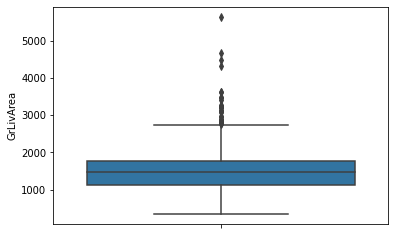

      GrLivArea  YearBuilt  SalePrice
1349       2358       1872     122000
1137       1020       1875      94000
747        2640       1880     265979
304        3493       1880     295000
1132       2210       1880     117500
...         ...        ...        ...
898        2364       2009     611657
515        2020       2009     402861
157        1968       2009     269500
762        1547       2009     215200
378        1856       2010     394432

[1460 rows x 3 columns]


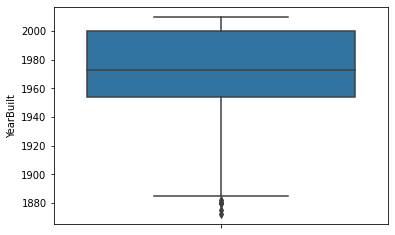

In [5]:
# 外れ値の確認
sns.boxplot(y = df["GrLivArea"])
print(df.sort_values('GrLivArea'))
plt.show()

sns.boxplot(y = df["YearBuilt"])
print(df.sort_values('YearBuilt'))
plt.show()

明らかに間違っている数値は無いので、今回は外れ値の対処は行わない。

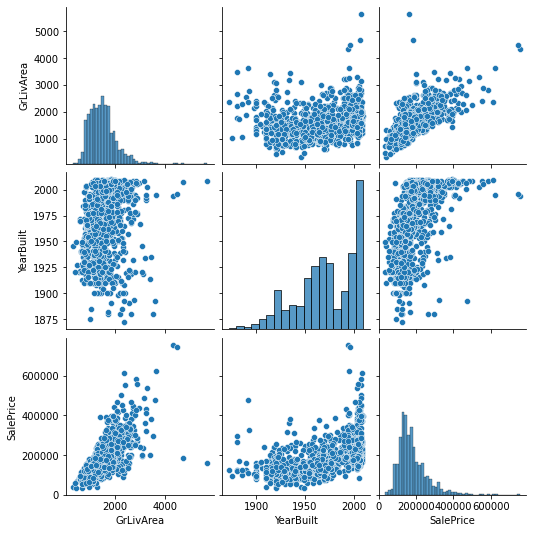

In [6]:
sns.pairplot(df)

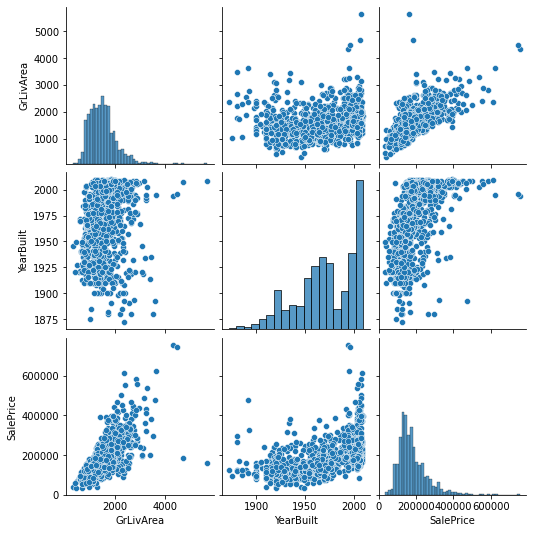

In [7]:
sns.pairplot(df)

In [8]:
# numpy.ndarrayに変換
X = df.loc[:,["GrLivArea","YearBuilt"]].values
y = df.loc[:,["SalePrice"]].values

# 訓練データと検証データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 標準化
sc = StandardScaler()

# 訓練用データ
sc = sc.fit(X_train)
X_train = sc.transform(X_train)

sc = sc.fit(y_train)
y_train = sc.transform(y_train)

# 検証用データ
sc = sc.fit(X_test)
X_test = sc.transform(X_test)

sc = sc.fit(y_test)
y_test = sc.transform(y_test)

# print(X_train)

In [9]:
# 線形回帰
lr = LinearRegression()

# 線形モデルの重みを学習
lr = lr.fit(X_train, y_train)

# 検証データの推定
y_pred = lr.predict(X_test)

In [10]:
# 評価
y_train_pred = lr.predict(X_train) # 学習データに対する目的変数を予測
print('MSE train data: ', mean_squared_error(y_train, y_train_pred)) # 学習データを用いたときの平均二乗誤差を出力
print('MSE test data: ', mean_squared_error(y_test, y_pred))         # 検証データを用いたときの平均二乗誤差を出力

MSE train data:  0.3528108795013772
MSE test data:  0.3245198354622948


mean_squared_error = 0.3245198354622948


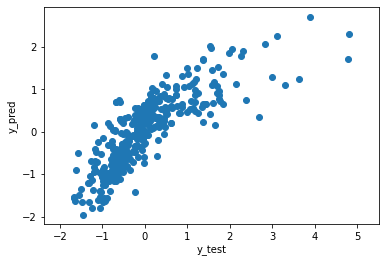

In [11]:
# 可視化
from sklearn.metrics import mean_squared_error

def regression_view(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    print("mean_squared_error =", mse)

    plt.xlabel("y_test")
    plt.ylabel("y_pred")
    plt.scatter(y_test, y_pred)
    plt.axis("equal")
    plt.show()

list_mse = [mean_squared_error(y_test, y_pred)]
regression_view(y_test, y_pred)

**【問題3】手法の比較**

In [12]:
def my_fuc(clf, X_train, X_test, y_train, y_test, list_mse):
    print(str(clf).split(".")[-1][:-2])
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    regression_view(y_test, y_pred)
    list_mse += [mean_squared_error(y_test, y_pred)]

001, verbose=Fals
mean_squared_error = 0.26062322280943145


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


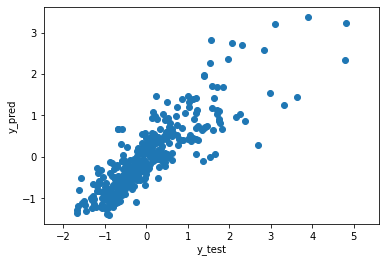

0, presort='deprecated',
                      random_state=None, splitter='best
mean_squared_error = 0.47298586415323585


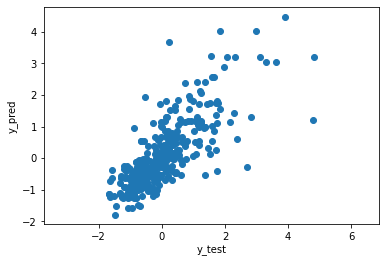

0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=Fals


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


mean_squared_error = 0.32942371037742535


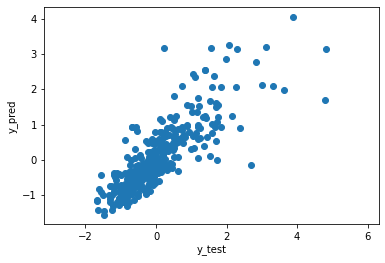

In [13]:

list_clf = [svm.SVR(), tree.DecisionTreeRegressor(), RandomForestRegressor()]

for clf in list_clf:
    my_fuc(clf, X_train, X_test, y_train, y_test, list_mse)


In [22]:
df_mse = pd.DataFrame([['線形回帰', 'SVM', '決定木', 'ランダムフォレスト'], list_mse])
df_mse = df_mse.T
# df_mse.columns = ["model", "mse"]
df_mse

,0,1
0,線形回帰,0.32452
1,SVM,0.260623
2,決定木,0.472986
3,ランダムフォレスト,0.329424


平均二乗誤差はSVMが一番低かった